In [191]:
file=r'D:\Ameyem\D11\Data\NEC_North_4wells_TD_realtionaftersynthetic_tie.xlsx'
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [192]:
## Get the TD relation data from synthtic tied check shots
d11_well_df=pd.read_excel(file)

fields=d11_well_df.keys().values
# d11_well_df[fields[0]]

# plt.plot(d11_well_df[fields[0]],d11_well_df[fields[1]])
# d11_well_df
# d11_well_df['TVDSS']=-d11_well_df['TVDSS'].values
# d11_well_df['TWT']=-d11_well_df['TWT'].values

In [229]:
folder=r"..\d11_data\\"
from petrel_well_file_readers import *
# well_tops_file=folder+'d11_welltops_payzones_220519_sai.dat'
well_tops_file=folder+'Sunder_WellTops_SR.dat'
# well_tops_file=folder+'manabesh_sand_zones.dat'
wt=read_welltops(well_tops_file)
wt=wt.sort_values(['MD'])
# wt

## Get the required well tops data from well tops file
wells_names=wt.Well.unique()
# wt.Surface.unique()
# wt['MD'].values.astype(float)
wt.Surface.unique()
# wt[wt.Surface.isin(req_tops)][wt.Well=='NEC25-A1']
# well_name=wells_names[0]
# wt[wt.Well==well_name].Surface.values
req_tops=['Water Bottom','P_Sand_380_T', 'P_Sand_330_T','P_Sand_290_T','P_Sand_270_T','LPU','M_Sand_80_T', 'M_Sand_70_T','ULMSB','LM_sand_60_T',
 'LM_sand_40_T','ULMSB_1']
req_data=wt[wt.Surface.isin(req_tops)][['Z','TWT auto','Well','Surface','X','Y']]

req_data[['TWT auto','Z']]=-req_data[['TWT auto','Z']].values.astype(float)
req_data[['X','Y']]=req_data[['X','Y']].values.astype(float)
# req_data
# d11_well_df['Well'].unique()
d11_well_df[d11_well_df.Well==td_wells[i]].head()

,TVDSS,TWT,Average velocity,Interval velocity,Well
710,-26.5,-35.76,1482.0,1482.0,A3(D10)
711,-21.5,-29.01,1482.0,1482.0,A3(D10)
712,-16.5,-22.27,1482.0,1482.0,A3(D10)
713,-11.5,-15.52,1482.0,1482.0,A3(D10)
714,-6.5,-8.77,1482.0,1482.0,A3(D10)


In [230]:
wtop_wells=['NEC25-A2(D15)', 'NEC25-A4(D11)', 'NEC25-A1(D9)', 'NEC25-A3(D10)']
td_wells=['A2(D15)', 'A4(D11)', 'A1(D9)', 'A3(D10)']

i=0
# d11_well_df[d11_well_df.Well==td_wells[i]]
single_well_td_df=d11_well_df[d11_well_df.Well==td_wells[i]]

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
def predictivemodel4Y(df,lables=['X','Y']):
    # X=chkt['MD'].values
    X=df[lables[0]].values
    X.shape=len(X),1
    y=df[lables[1]].values
    return LinearRegression().fit(X, y)
    # md2twt.predict(diabetes_X_test)
def polypredict4Y(df,lables=['X','Y'],degree=2):
    # PolynomialFeatures (prepreprocessing)
    poly = PolynomialFeatures(degree=degree)
    X=df[lables[0]].values
    X.shape=len(X),1    
    X_ = poly.fit_transform(X)
#     X_test_ = poly.fit_transform(X_test)
    y=df[lables[1]].values
    # Instantiate
    lg = LinearRegression()
    # Fit
    lg.fit(X_, y)   
    
    return poly,lg

In [232]:
## Calculation of TWT with the well tied checkshot data
req_data['TWT']=0
for i in range(len(wtop_wells)):
    single_well=req_data[req_data.Well==wtop_wells[i]]
    single_well_td_df=d11_well_df[d11_well_df.Well==td_wells[i]]    
#     pol,lg=polypredict4Y(single_well_td_df,lables=['TVDSS','TWT'],degree=3)    
#     mtvdss2twt=redictivemodel4Y(single_well,lables=['TVDSS','TWT'])
    for idx,v in zip(single_well.index,single_well['Z'].values):
        tempdf=single_well_td_df[(single_well_td_df['TVDSS'].values>= v-5) & (single_well_td_df['TVDSS'].values <= v+5)]
        mtvdss2twt=predictivemodel4Y(tempdf,lables=['TVDSS','TWT'])
        req_data.loc[req_data.index==idx,'TWT']=mtvdss2twt.predict([[v]])[0]
        
#         print(v,mtvdss2twt.predict([[v]])[0],end=',')
#         print(req_data['Well'].iloc[[i]])




# xt=np.array([2730,2817.63,2821.41])
# xt.shape=len(xt),1
# lg.predict(pol.fit_transform(xt))

In [240]:
# # req_data['TWT']=0
# for idx,z in zip(single_well.index,single_well['Z'].values):
#     print(idx,z)
#     req_data.loc[req_data.index==idx,'TWT']=mtvdss2twt
# #     single_well['Z']
# req_data

In [234]:
# for top,bottom in zip(req_tops[:-1],req_tops[1:]):
#     print(top,bottom )
#     for i in range(len(wtop_wells)):
#     single_well=req_data[req_data.Well==wtop_wells[i]]
# req_data.loc[req_data.Well==w,'TWT']=[77.0,1165.3,1296.12,1365.1,1397.72,1564.22]
# req_data.loc[req_data.Well==w,'TWT']

In [239]:
# single_well_td_df[['TVDSS']]
layers=pd.DataFrame(columns=['Lid','Well','TopLayer','Bot_Layer','isochrone','isopack','TWT2middle','Z2middle','Vint','X','Y'])
layers.loc[0,'Lid']=2
indx=0

topvals=np.zeros((1,4))
botvals=np.zeros((1,4))
layern=0
for top,bottom in zip(req_tops[:-1],req_tops[1:]):
    print(top,bottom )    
    for i in range(len(wtop_wells)):        
        single_well=req_data[req_data.Well==wtop_wells[i]]
        topvals=single_well.loc[single_well.Surface==top,['TWT','Z','X','Y']]
        botvals=single_well.loc[single_well.Surface==bottom,['TWT','Z','X','Y']]
        thevals=(topvals.values+botvals.values)/2
#         print(len(thevals))
        if(len(thevals)>0):
            layers.loc[indx,['TWT2middle','Z2middle','X','Y']]=(topvals.values+botvals.values)/2
            layers.loc[indx,['isochrone','isopack']]=-topvals.values[0][0:2]+botvals.values[0][0:2]
            layers.loc[indx,['Lid','Well','TopLayer','Bot_Layer']]=[layern,wtop_wells[i],top,bottom]
            indx+=1
        else:
            print('Not allocated')
        
    layern+=1
        
#         print(-topvals.values[0:2]+botvals.values[0:2])
        
layers['Vint']=2000*layers['Z2middle']/layers['TWT2middle']
layers

Water Bottom P_Sand_380_T
P_Sand_380_T P_Sand_330_T
P_Sand_330_T P_Sand_290_T
P_Sand_290_T P_Sand_270_T
P_Sand_270_T LPU
LPU M_Sand_80_T
Not allocated
M_Sand_80_T M_Sand_70_T
Not allocated
M_Sand_70_T ULMSB
Not allocated
Not allocated
ULMSB LM_sand_60_T
Not allocated
Not allocated
Not allocated
LM_sand_60_T LM_sand_40_T
Not allocated
Not allocated
Not allocated
LM_sand_40_T ULMSB_1
Not allocated
Not allocated
Not allocated


,Lid,Well,TopLayer,Bot_Layer,isochrone,isopack,TWT2middle,Z2middle,Vint,X,Y
0,0,NEC25-A2(D15),Water Bottom,P_Sand_380_T,1052.21,1088.3,579.414,621.15,2144.06,589992,2.2847e+06
1,0,NEC25-A4(D11),Water Bottom,P_Sand_380_T,985.428,1067.46,622.892,610.73,1960.95,589503,2.28253e+06
2,0,NEC25-A1(D9),Water Bottom,P_Sand_380_T,1096.91,1129.3,616.32,628.65,2040.01,593998,2.29299e+06
3,0,NEC25-A3(D10),Water Bottom,P_Sand_380_T,1066.39,1112.91,627.764,640.425,2040.34,582928,2.27682e+06
4,1,NEC25-A2(D15),P_Sand_380_T,P_Sand_330_T,112.13,130.82,1161.58,1230.71,2119.02,589992,2.28478e+06
5,1,NEC25-A4(D11),P_Sand_380_T,P_Sand_330_T,103.029,127.44,1167.12,1208.18,2070.36,589511,2.28253e+06
6,1,NEC25-A1(D9),P_Sand_380_T,P_Sand_330_T,88.9786,114.17,1209.27,1250.38,2068.01,593967,2.29297e+06
7,1,NEC25-A3(D10),P_Sand_380_T,P_Sand_330_T,91.053,117.99,1206.49,1255.88,2081.87,582939,2.27682e+06
8,2,NEC25-A2(D15),P_Sand_330_T,P_Sand_290_T,55.3097,68.98,1245.3,1330.61,2137,589995,2.28485e+06
9,2,NEC25-A4(D11),P_Sand_330_T,P_Sand_290_T,51.4275,65.08,1244.35,1304.44,2096.58,589514,2.28253e+06


In [ ]:
plt.plot(layers[,ypred,'*')

In [273]:
def geterror(y,ypred):
    return np.sqrt(np.sum([(a-b)**2 for a,b in zip(y,ypred)]))
def doRegression(layers,infeatures=['Lid','isochrone','TWT2middle','X','Y'],ofeature):
    # Machine learning LR with two features
    X=layers[['Lid','isochrone','TWT2middle']].values#,'TWT2middle','X','Y'
    # a,b=X.shape
    # X.shape=b,a
    y=layers['Vint'].values
    X=X/np.max(X,axis=0)
    lg=LinearRegression().fit(X, y)
    ypred=lg.predict(X)
    plt.plot(y,ypred,'*')
    return lg,geterror(y,ypred)

166.0998964155509

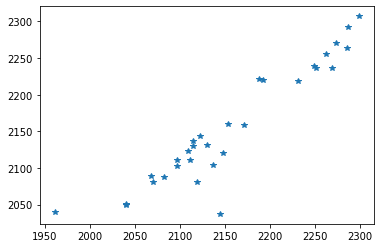

In [315]:
# Machine learning LR with two features
X=layers[['Lid','isochrone','TWT2middle']].values#,'TWT2middle','X','Y'
# a,b=X.shape
# X.shape=b,a
y=layers['Vint'].values
X=X/np.max(X,axis=0)
lg=LinearRegression().fit(X, y)
ypred=lg.predict(X)
plt.plot(y,ypred,'*')
geterror(y,ypred)

165.8440109855424

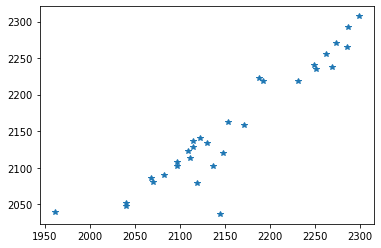

In [316]:
# Machine learning LR with five features
X=layers[['Lid','isochrone','TWT2middle','X','Y']].values
# a,b=X.shape
# X.shape=b,a
y=layers['Vint'].values
X=X/np.max(X,axis=0)
lg=LinearRegression().fit(X, y)
ypred=lg.predict(X)
plt.plot(y,ypred,'*')
geterror(y,ypred)

38.88768655687231

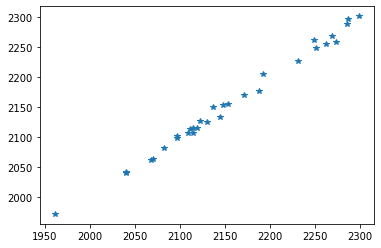

In [321]:
# Machine learning PR with five features
X_=layers[['Lid','isochrone','TWT2middle','X','Y']].values#
poly = PolynomialFeatures(degree=2)
X_=X_/np.max(X_,axis=0)
X = poly.fit_transform(X_)
y=layers['Vint'].values

lg=LinearRegression().fit(X, y)
ypred=lg.predict(X)
plt.plot(y,ypred,'*')
geterror(y,ypred)



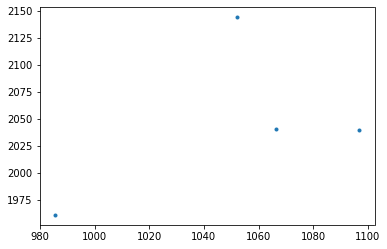

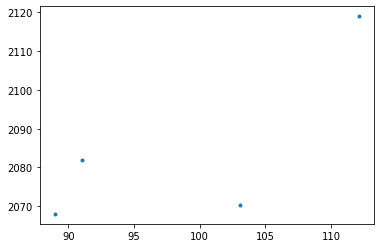

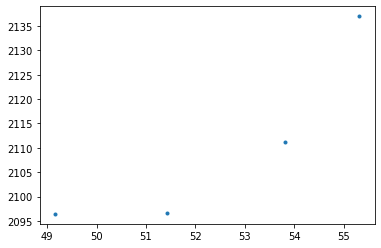

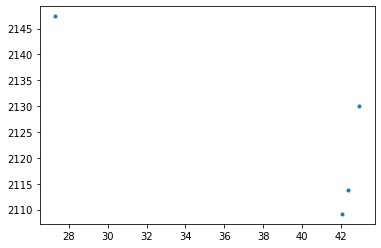

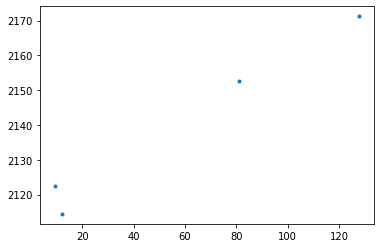

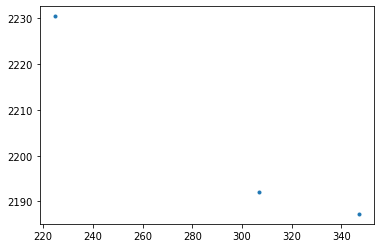

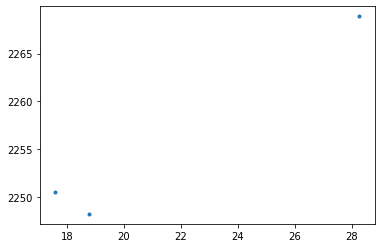

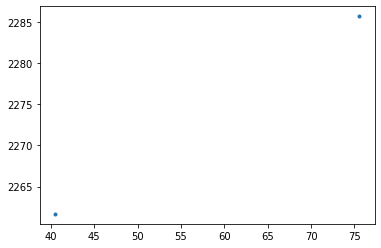

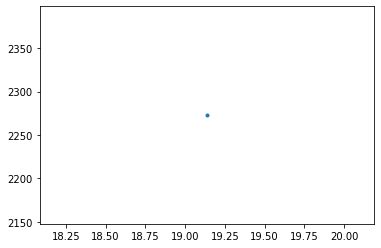

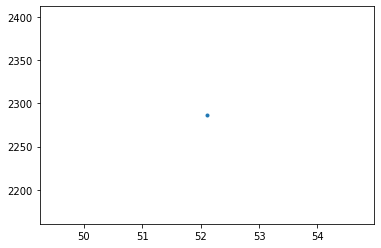

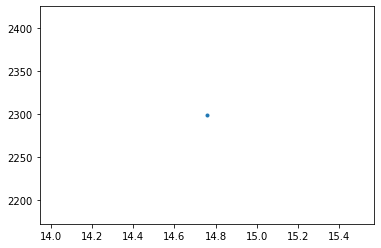

In [246]:
# single_well_td_df[['TVDSS']]>= v-2
# single_well_td_df
# indx=0

# req_data.head()
# layers
# topvals.values[0]
# topvals.values[0][0:2]
# (topvals.values+botvals.values)/2
for l in layers['Lid'].unique():
    plt.plot(layers.loc[layers.Lid==l,'isochrone'],layers.loc[layers.Lid==l,'Vint'],'.')
    plt.show()

In [162]:
# single_well_td_df ypred=array([2317.74696469, 2388.88898637, 2391.95776239])
# for v in single_well['Z'].values:
#     print(v)
print(v)
# single_well_td_df[['TVDSS']].between(v-10,v)
# single_well_td_df[(single_well_td_df['TVDSS'].values>= v-10) & (single_well_td_df['TVDSS'].values <= v+10)]
# single_well_td_df['TVDSS']

1548.75


In [115]:
# single_well.index[0]
# df.loc[df['line_race'] == 0, 'rating'] = 0
# req_data.loc[req_data.index==single_well.index[0],'TWT']=30
# req_data[req_data.index==single_well.index[0]]
# mtvdss2twt
single_well
# mtvdss2twt=predictivemodel4Y(single_well_td_df,lables=['TVDSS','TWT'])
# # single_well[]
# # single_well_td_df
# mtvdss2twt.predict([[2730],[2817.63],[2821.41]])

pol,lg=polypredict4Y(single_well_td_df,lables=['TVDSS','TWT'],degree=3)

xt=np.array([2730,2817.63,2821.41])
xt.shape=len(xt),1
lg.predict(pol.fit_transform(xt))